# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read


The rows of information represented in the songs.csv file are:
- Title: the name of the song
- Artist: the name of the artist
- Year: the year in which the song was released [1924 to 2010]. We will be considering data from 1930 to 2010.
- Popularity: the popularity of the song as a value out of 1 (example: 0.592)
- Duration: the duration of the song in seconds
- Tempo: the speed of the song (in beats per minute)

For this project, I will not be needing all the rows of data. I will be using the 'Name', 'Popularity', 'Tempo' and 'Year' data only. 

For the popularity row, we will be excluding 'nan' and for the tempo row, we will be excluding '0' as this is unreliable data.  



### Step 1b: Planning 
#### Write a description of what your program will produce

After brainstorming several ideas, I was able to narrow down my choices to these three ideas:
- Bar chart showing the top 10 most popular artists (ie artists with most popular songs) for a given year year
- Bar chart showing artists with most number of songs 
- Line chart showing the average popularity for a given tempo over the years, for multiple tempo

I chose the third idea as it interested me the most. To represent my analysis visually, I would be using a line chart with years on the x-axis and the average popularity on the y-axis. I will be considering three different ranges of tempo, thereby creating three different lines on the same graph, to allow for easy comparison in trends over the years.

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

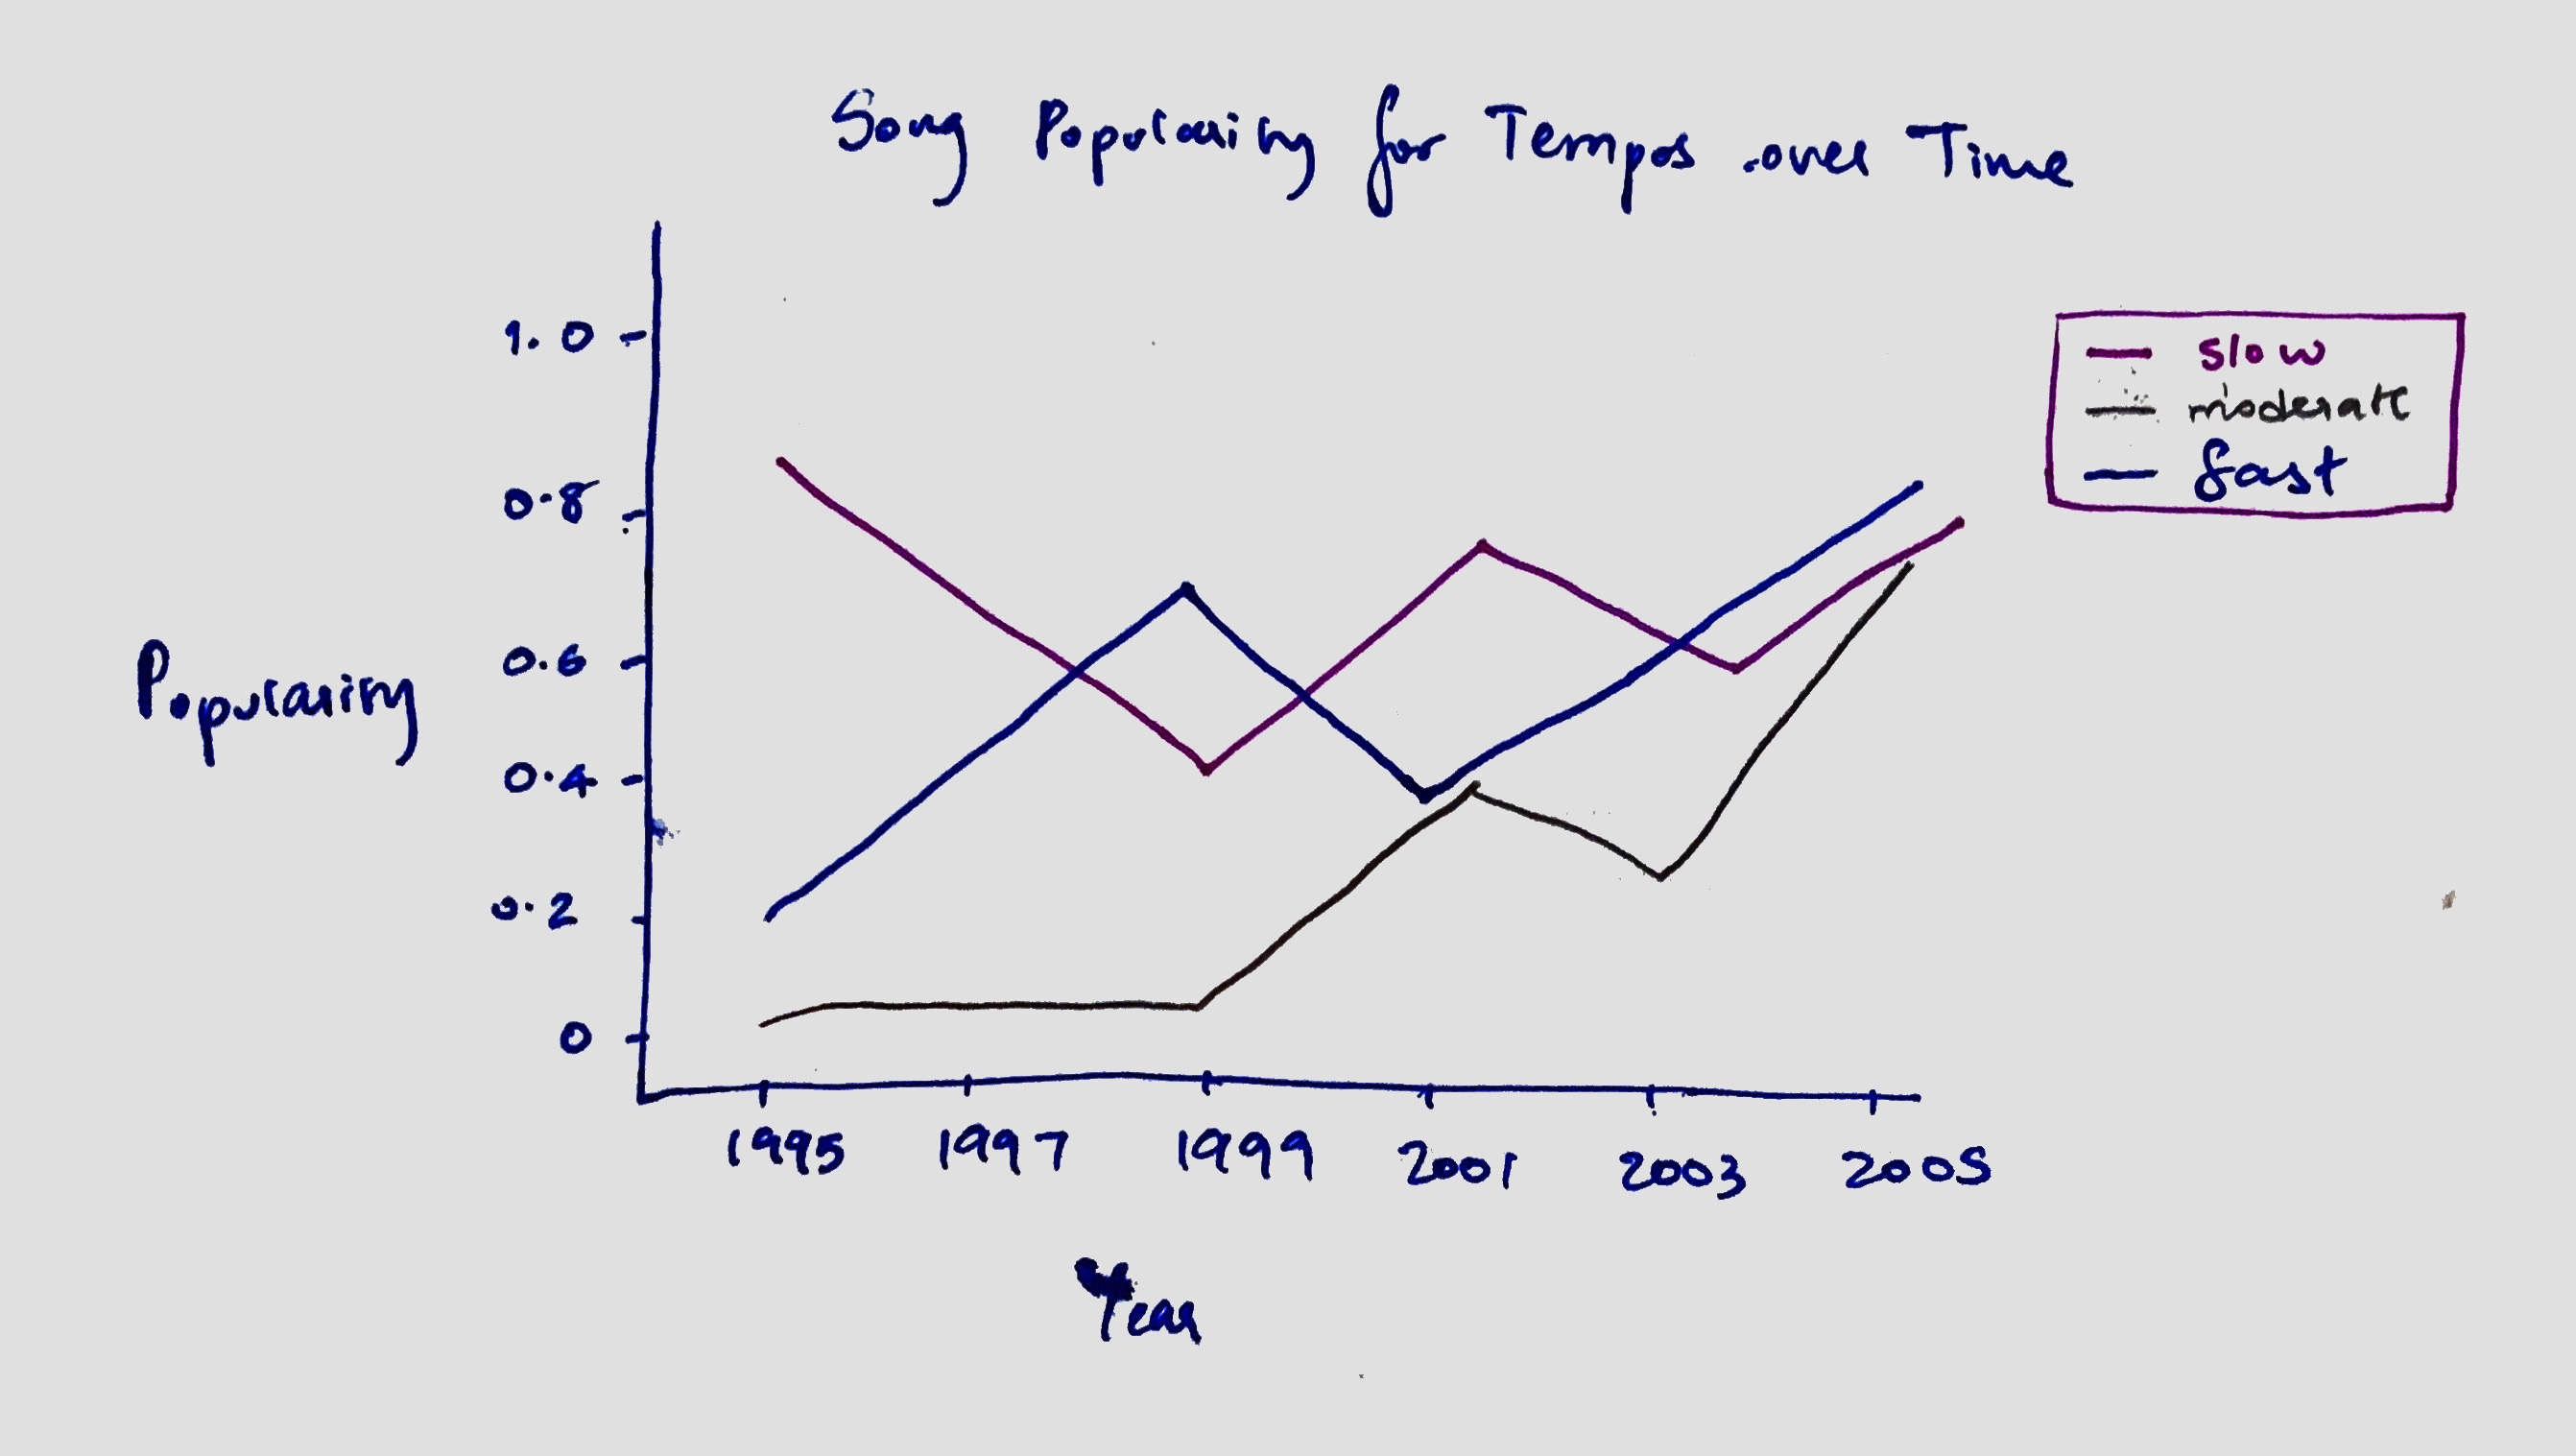



### Step 2a: Building
#### Design data definitions

For this project, I will not be needing all the rows of data. I will be using the 'Name', 'Popularity', 'Tempo' and 'Year' data only because I will be plotting different graphs for a range of tempo with the average popularity against years. 

For the popularity row, we will be excluding 'nan' and for the tempo row, we will be excluding '0' as this is unreliable data.  

In [1]:

from cs103 import *
from typing import NamedTuple, List
import csv
from enum import Enum
from matplotlib import pyplot
import numpy as np



##################
# Data Definitions

Tempo = Enum('Tempo', ['slow', 'moderate', 'fast'])
# interp. a tempo type; which can either be slow, moderate, or fast



SongData = NamedTuple('SongData', [('name', str), 
                                   ('year', int), 
                                   ('popularity', float),
                                   ('tempo', float)])

# interp. a song record with its name, year, popularity and tempo

SD1 = SongData('Silent Night', 2003, 0.542898743, 87.002)
SD2 = SongData("On the Surface", 2005, 0.473346541, 135.598)

# template based on compound 
@typecheck
def fn_for_song_data(sd: SongData) -> ...: 
    return ...(sd.name, 
               sd.year, 
               sd.popularity,
               sd.tempo)

# List[SongData]
# interp. a list of song records

LOSD0 = []
LOSD1 = [SD1, SD2]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_losd(losd: List[SongData]) -> ...: 
    # description of the acc                          
    acc = ... # type: ...
    for sd in losd:
        acc = ...(acc, fn_for_song_data(sd))
    return ...(acc)



### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

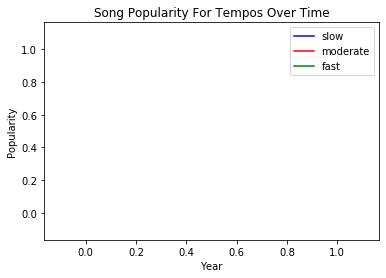

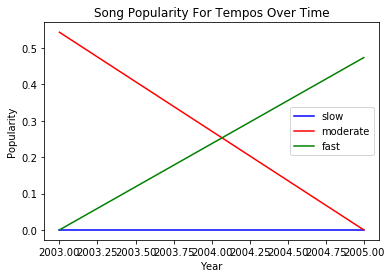

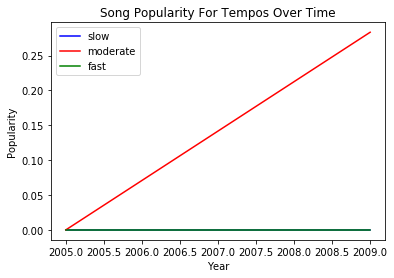

3 of 3 tests passed


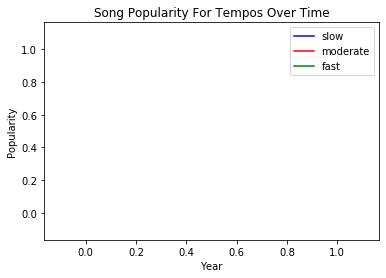

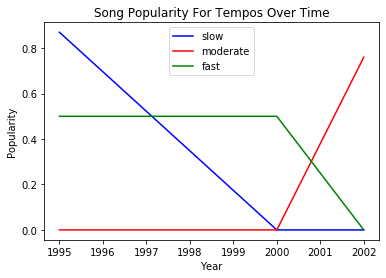

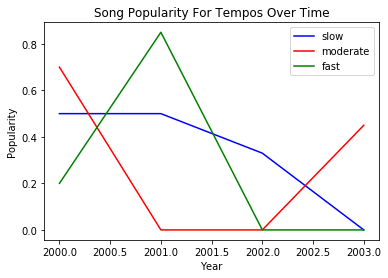

3 of 3 tests passed
3 of 3 tests passed
5 of 5 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
1 of 1 tests passed
3 of 3 tests passed
2 of 2 tests passed


In [2]:
###########
# Functions


@typecheck
def main(filename: str, tempo_start:float, tempo_mid_1:float, tempo_mid_2: float, tempo_end:float) -> None:
    """
    Reads the song data from given filename and displays a line chart for year vs song popularity 
    for three different tempo and returns None
    """
    # return None #stub
    # Template from HtDAP, based on function composition 
    return analyze(read(filename), tempo_start, tempo_mid_1, tempo_mid_2, tempo_end) 


@typecheck
def read(filename: str) -> List[SongData]:
    """    
    reads information from the specified file and returns a list of song data 
    """
    #return []  #stub
    # Template from HtDAP
    
    # losd contains the result so far
    losd = [] # type: List[SongData]
    
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        
        next(reader)
        for row in reader:
            
            if is_valid_row(row):
                sd = SongData(row[0], parse_int(row[2]), parse_float(row[3]), parse_float(row[5]))
                losd.append(sd)

    return losd
      

@typecheck
def analyze(losd: List[SongData], tempo_start:float, tempo_mid_1:float, tempo_mid_2: float, tempo_end:float) -> None: 
    """ 
    displays a line chart for year vs song popularity for three different ranges of tempo 
    and returns None
    """ 
    #return None
    #template from viz
        
    order = np.argsort(get_years(losd))
    x_values = np.array(get_years(losd))[order]
    y_values_1 = np.array(get_all_avg_pop(losd, tempo_start, tempo_mid_1))[order]
    y_values_2 = np.array(get_all_avg_pop(losd, tempo_mid_1, tempo_mid_2))[order]
    y_values_3 = np.array(get_all_avg_pop(losd, tempo_mid_2, tempo_end))[order]

    pyplot.title('Song Popularity For Tempos Over Time')
    pyplot.xlabel('Year')
    pyplot.ylabel('Popularity')
    pyplot.plot(x_values, y_values_1, "b", label = "slow")
    pyplot.plot(x_values, y_values_2, "r", label = "moderate")
    pyplot.plot(x_values, y_values_3, "g", label = "fast")
    pyplot.legend(loc="best")
    pyplot.show()
    

@typecheck
def get_years(losd:List[SongData]) -> List[int]:
    """
    returns a list of years from losd
    """
    #return [] #stub
    #template from List[SongData]
    acc = []
    
    for sd in losd:
        acc.append(sd.year)
        
    return acc


@typecheck
def average(lof: List[float]) -> float:
    """
    returns the average for a list of numbers (by dividing the total by the number of objects in the list)
    """
    #return 0 #stub
    #template based on composition
    if lof == []:
        return 0
    
    total = sum(lof)
    count = len(lof)
    avg = total/count
    return avg

            
@typecheck
def get_all_avg_pop(losd:List[SongData], tempo_start:float, tempo_end: float) -> List[float]:
    """
    returns a list of popularities for all years in the list of song data for a given tempo range
    """
    # return [] #stub
    # template from List[SongData] with two additional parameters
    years=get_years(losd)
    acc = []
    for y in years:
        acc.append(get_avg_pop(losd, y, tempo_start, tempo_end))
    
    return acc
    

@typecheck
def get_avg_pop(losd:List[SongData], year:int, tempo_start:float, tempo_end:float) -> float:
    """
    returns the average popularity for a list of song data for a given year and tempo range
    """
    # return 0.0 #stub
    # template based on composition 
    filtered_year = filter_songs_by_year(losd, year)
    filtered_tempo = filter_songs_by_tempo(filtered_year, tempo_start, tempo_end)
    filtered_pop = filter_songs_pop(filtered_tempo, year, tempo_start, tempo_end)
   
    return average(filtered_pop)

    
@typecheck
def filter_songs_pop(losd: List[SongData], year: int, 
                        tempo_start: float, tempo_end: float) -> List[float]:
    """
    returns a list of song popularity from a filtered list of song data 
    (including data from a particular tempo range and year only)
    """
    #return [] #stub
    # template based on List[SongData] with three additional parameters
    
    # acc is the result so far
    acc = [] #type: List[SongData]
    filtered_year = filter_songs_by_year(losd, year)
    filtered_tempo = filter_songs_by_tempo(filtered_year, tempo_start, tempo_end)
    
    for sd in filtered_tempo:
        acc.append(sd.popularity)
        
    return acc


@typecheck
def filter_songs_by_tempo(losd: List[SongData], tempo_start: float, tempo_end: float) -> List[SongData]:
    """
    returns the list of song data that have the same range of tempo as the given range of tempo
    """
    #return [] #stub
    # template based on List[SongData] with two additional parameters
    
    # acc is the result so far
    acc = [] #type: List[SongData]
    
    for sd in losd:
        if song_tempo_is(sd, tempo_start, tempo_end):
            acc.append(sd)
            
    return acc



@typecheck
def song_tempo_is(sd: SongData, tempo_start: float, tempo_end: float) -> bool:
    """
    returns True if the song tempo is within the given range of tempo, False otherwise
    """
    #return True #stub
    #template based on SongData and two additional parameters (tempo_start and tempo_end)
    
    return sd.tempo > tempo_start and sd.tempo <= tempo_end



@typecheck
def filter_songs_by_year(losd: List[SongData], year: int) -> List[SongData]:
    """
    returns a list of song data that have the same song year as the given year
    """
    #return [] #stub
    #template based on List[SongData] with two additonal parameters
    
    #acc is the result so far
    acc = [] #type:List[SongData]
    
    for sd in losd:
        if song_year_is(sd, year):
            acc.append(sd)
    return acc


@typecheck
def song_year_is(sd: SongData, year: int) -> bool:
    """
    returns True is the given year is the same as the song year, False otherwise
    """
    #return True #stub
    # template based on SongData and two additional parameters
    
    return sd.year == year



@typecheck
def is_valid_row(los: List[str]) -> bool:
    """
    returns False if a string in the 6th row (los[5]) is zero or 4th row is 'nan' 
    and True otherwise
    "0" or "nan" are not valid tempo or popularity respectively 
    """
    #return True
    #return ...(los) #template
    if los!=[]:
        return los[5]!= "0" and los[3] != 'nan'
    else:
        return False
    
start_testing()
expect(main("songs_empty1.csv", 0, 60, 120, 200), None)
expect(main("songs_small1.csv", 0, 60, 100, 200), None)
expect(main("songs_small2.csv", 0, 55.5, 127, 22.2), None)
#in the cell below are the expected graphs
summary()


start_testing()
expect(analyze([], 10, 60, 120, 180), None)
expect(analyze([SongData('xyz', 1995, 0.5, 200), 
                SongData('abc', 1995, 0.87, 58.8), 
                SongData('123', 2000, 0.5, 175), 
                SongData('song1', 2002, 0.76, 155)],  10, 60, 160, 220), None)
expect(analyze([SongData('x', 2000, 0.2, 200), 
                SongData('y', 2000, 0.5, 35),
                SongData('xy', 2000, 0.7, 140), 
                SongData('y', 2001, 0.5, 35),
                SongData('x', 2001, 0.85, 200), 
                SongData('dnd', 2002, 0.33, 45),
                SongData('xyz', 2003, 0.45, 155)], 10, 60, 160, 220), None)
#in the cell below are the expected graphs

summary()





start_testing()
# to test empty list
expect(read("songs_empty1.csv"), [])
expect(read("songs_small1.csv"), [SongData('Silent Night', 2003, 0.542898743, 87.002),
                             SongData("On the Surface", 2005, 0.473346541, 135.598)])
# to test more rows with more 'nan' and 0's to filter out
expect(read("songs_small2.csv"), [SongData("On the Surface", 2005, 0.473346541, 135.598),
                             SongData("Britannia",2009,0,123.958), 
                             SongData("Britannia",2009,0.567,56.6),
                             SongData("Britannia",2009,0.5,200)])

summary()
                
    
start_testing()

expect(is_valid_row(["L'antarctique","3 Gars Su'l Sofa","2007","nan","68.96281",
                     "62.294"]), False) # first condition is False, second is True
expect(is_valid_row(["Suite 909","Yello","1994","0.454042766","379.97669",
                     "0"]), False) # second condition is False, first is False
expect(is_valid_row(["Nine In The Afternoon (Radio Mix)","Panic At The Disco","2008","0.592641203",
                     "192.93995","77.595"]), True) # both conditions are True
expect(is_valid_row(["Red Star","Musetta","2007","nan","412.21179",
                     "0"]), False) # both conditions are False
expect(is_valid_row([]), False) # empty list

summary()




start_testing()
expect(average([1,2.2,3,4]), 2.55)
expect(average([]), 0)
summary()


start_testing()
expect(get_avg_pop([], 2008, 135, 200), 0) 
expect(get_avg_pop([SongData('xyz', 2007, 0.5, 200), 
                    SongData('abc', 2005, 0.87, 58.8), 
                    SongData('123', 1999, 0.5, 175), 
                    SongData('song1', 2007, 0.76, 155)], 2007, 150, 178.5), 0.76)
expect(get_avg_pop([SongData('song124', 2004, 0.67, 145.5), 
                    SongData('music2', 2005, 0.33, 87.9), 
                    SongData('songgg', 2004, 0.22, 133), 
                    SongData('some more music', 1998, 0.98, 79)], 2004, 80, 200),  0.445)
summary()


start_testing()
expect(filter_songs_pop([], 2009, 55.5, 125), [])
expect(filter_songs_pop([SongData('xyz', 2007, 0.5, 200), 
                         SongData('abc', 2005, 0.87, 58.8), 
                         SongData('123', 1999, 0.5, 175), 
                         SongData('song1', 2007, 0.76, 155)], 2007, 150, 178.5),  [0.76])
expect(filter_songs_pop([SongData('song124', 2004, 0.67, 145.5), 
                         SongData('music2', 2005, 0.33, 87.9), 
                         SongData('songgg', 2004, 0.22, 133), 
                         SongData('some more music', 1998, 0.98, 79)], 2004, 80, 200),  [0.67, 0.22])
summary()

start_testing()
expect(filter_songs_by_tempo([], 82.5, 160), [])
expect(filter_songs_by_tempo([SongData('xyz', 2009, 0.5, 200), 
                              SongData('abc', 2005, 0.87, 155)], 82.5, 160), [SongData('abc', 2005, 0.87, 155)])
expect(filter_songs_by_tempo([SongData('xyz', 2007, 0.5, 200), 
                              SongData('abc', 2005, 0.87, 58.8), 
                              SongData('123', 1999, 0.5, 175), 
                              SongData('song1', 2007, 0.76, 155)], 145, 199.9), [SongData('123', 1999, 0.5, 175), 
                                                                                 SongData('song1', 2007, 0.76, 155)])
summary()


start_testing()
expect(song_tempo_is(SongData('Silent Night', 2003, 0.542898743, 87.002), 20, 50), False)
summary()


start_testing()
expect(filter_songs_by_year([], 2005), [])
expect(filter_songs_by_year([SongData('xyz', 2009, 0.5, 200), 
                             SongData('abc', 2005, 0.87, 155)], 2005), [SongData('abc', 2005, 0.87, 155)])
expect(filter_songs_by_year([SongData('xyz', 2007, 0.5, 200), 
                             SongData('abc', 2005, 0.87, 155), 
                             SongData('123', 1999, 0.5, 200), 
                             SongData('song1', 2007, 0.76, 155)], 2007), [SongData('xyz', 2007, 0.5, 200), 
                                                                          SongData('song1', 2007, 0.76, 155)])

summary()

start_testing()
expect(song_year_is(SongData('Silent Night', 2003, 0.542898743, 87.002), 2003), True)
expect(song_year_is(SongData('Silent Night', 2003, 0.542898743, 87.002), 2005), False)

summary()

below are the expected graphs:

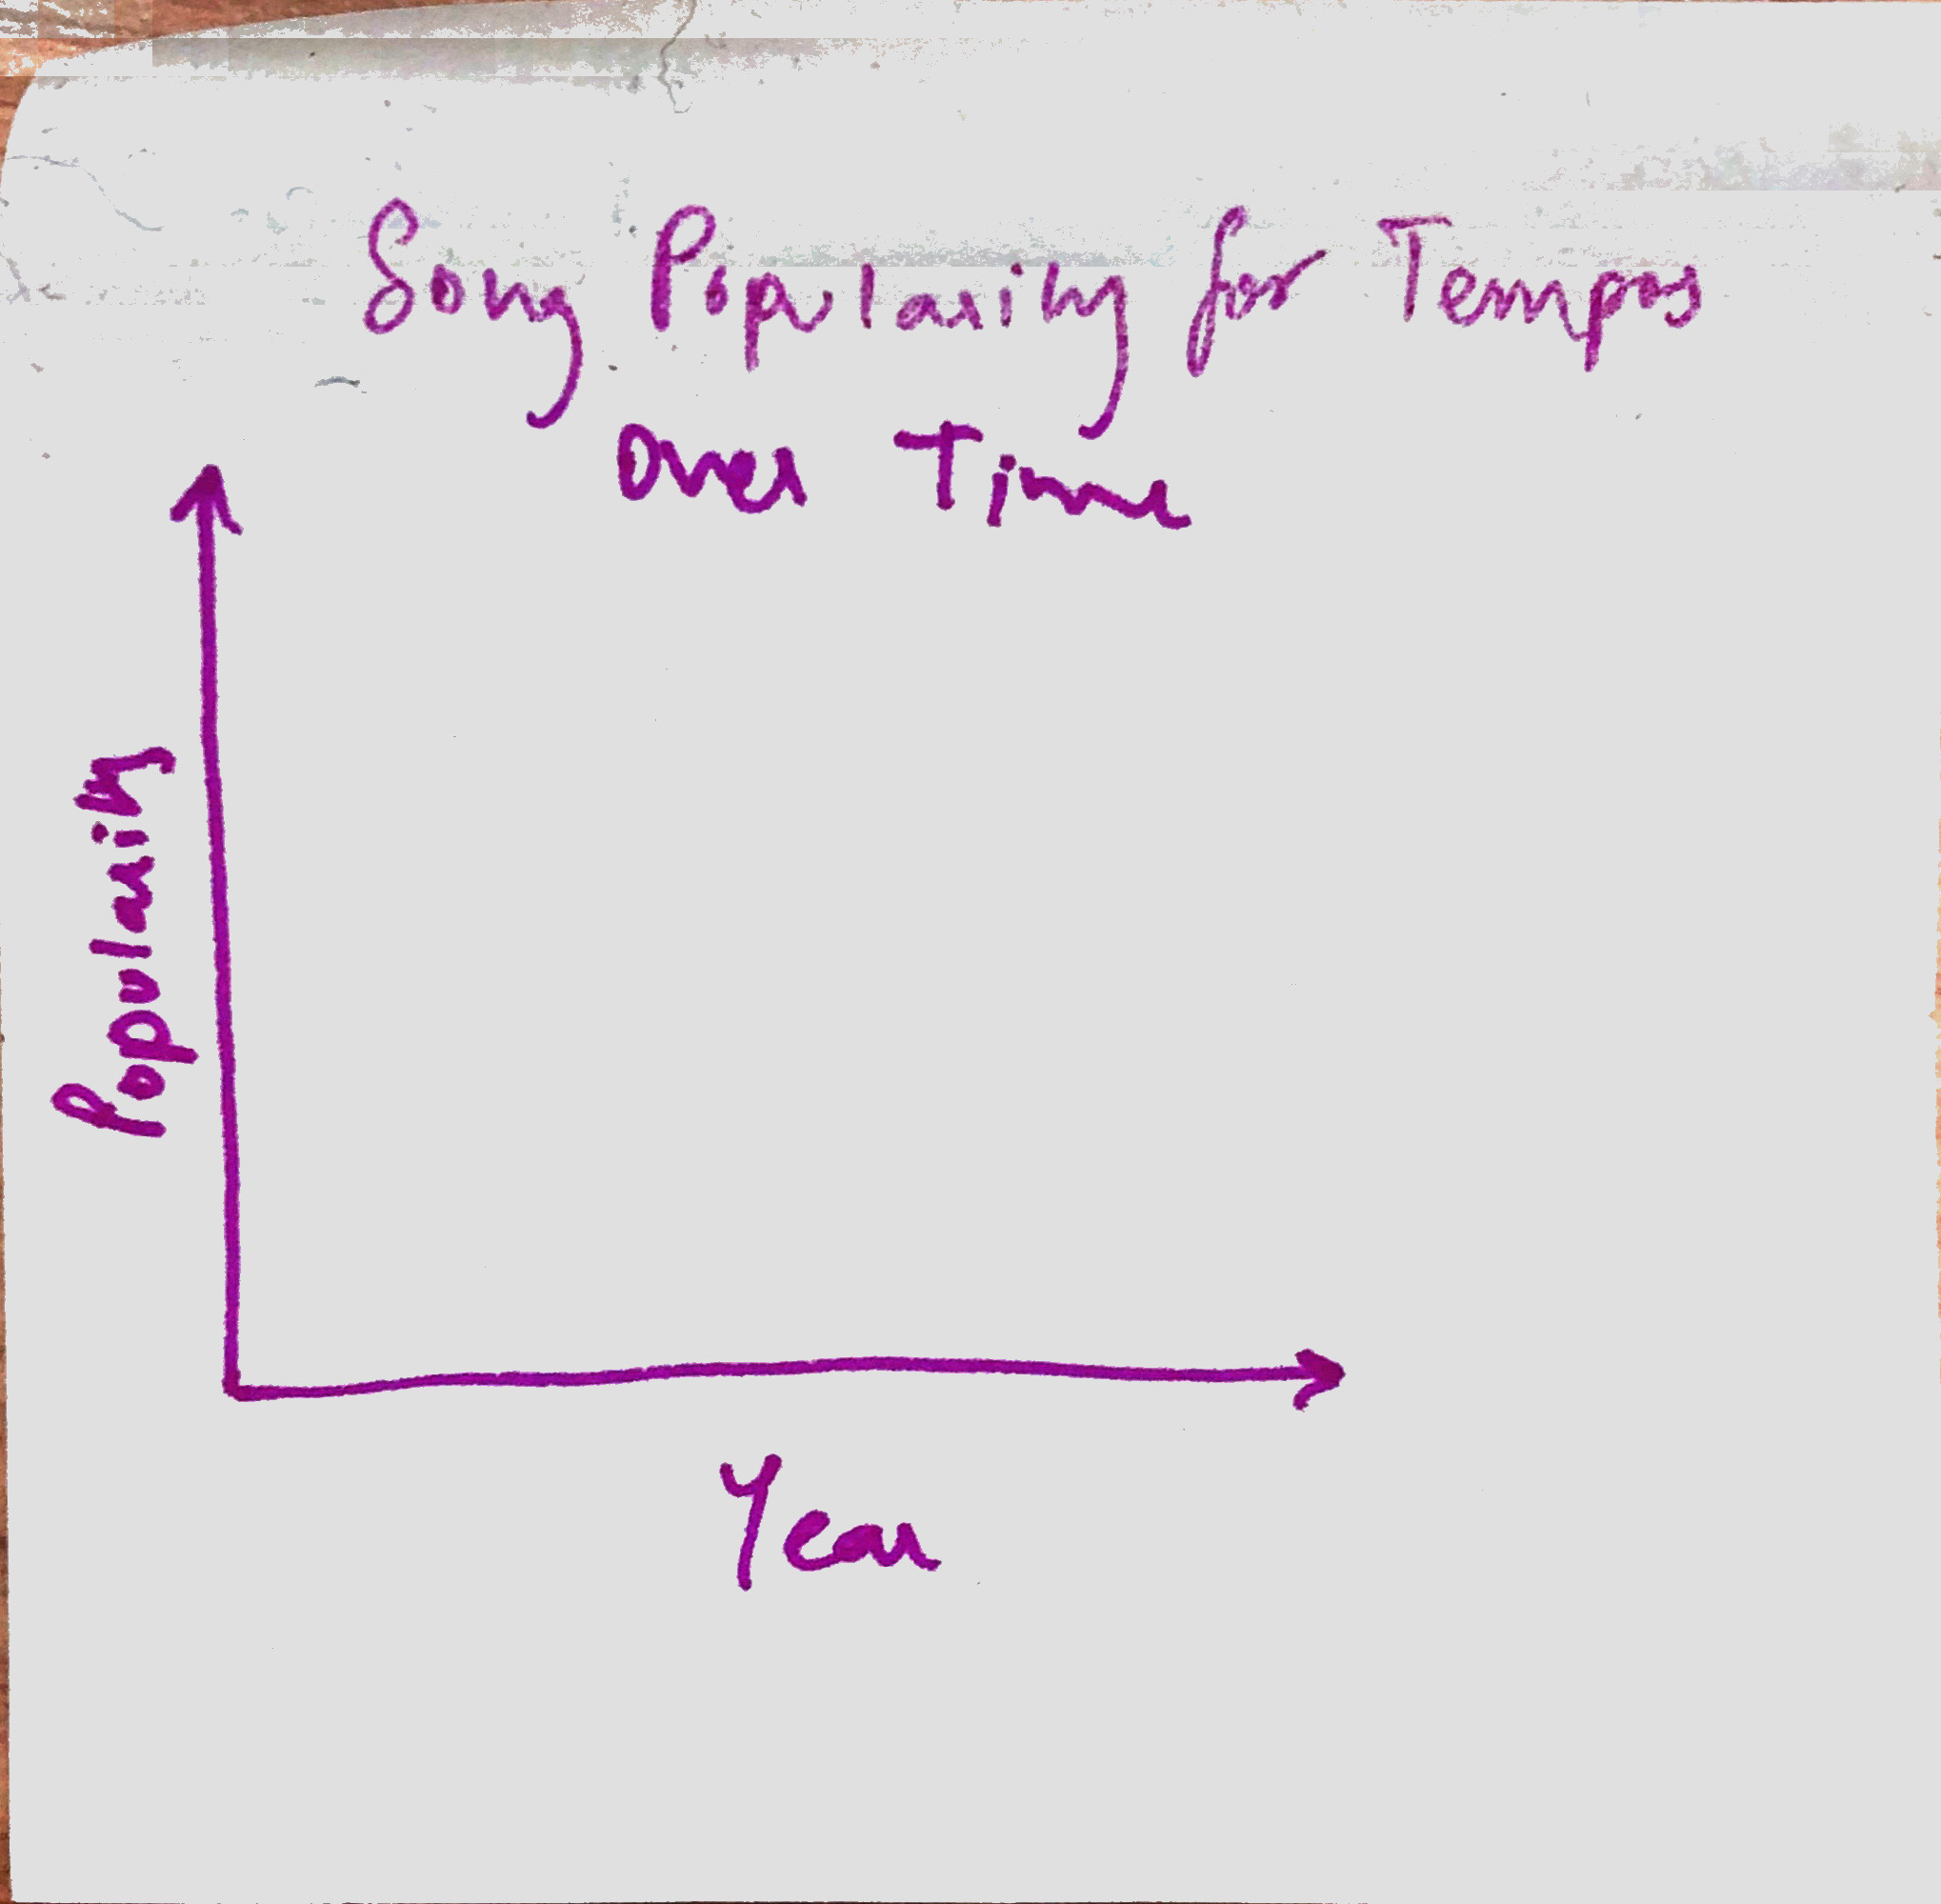

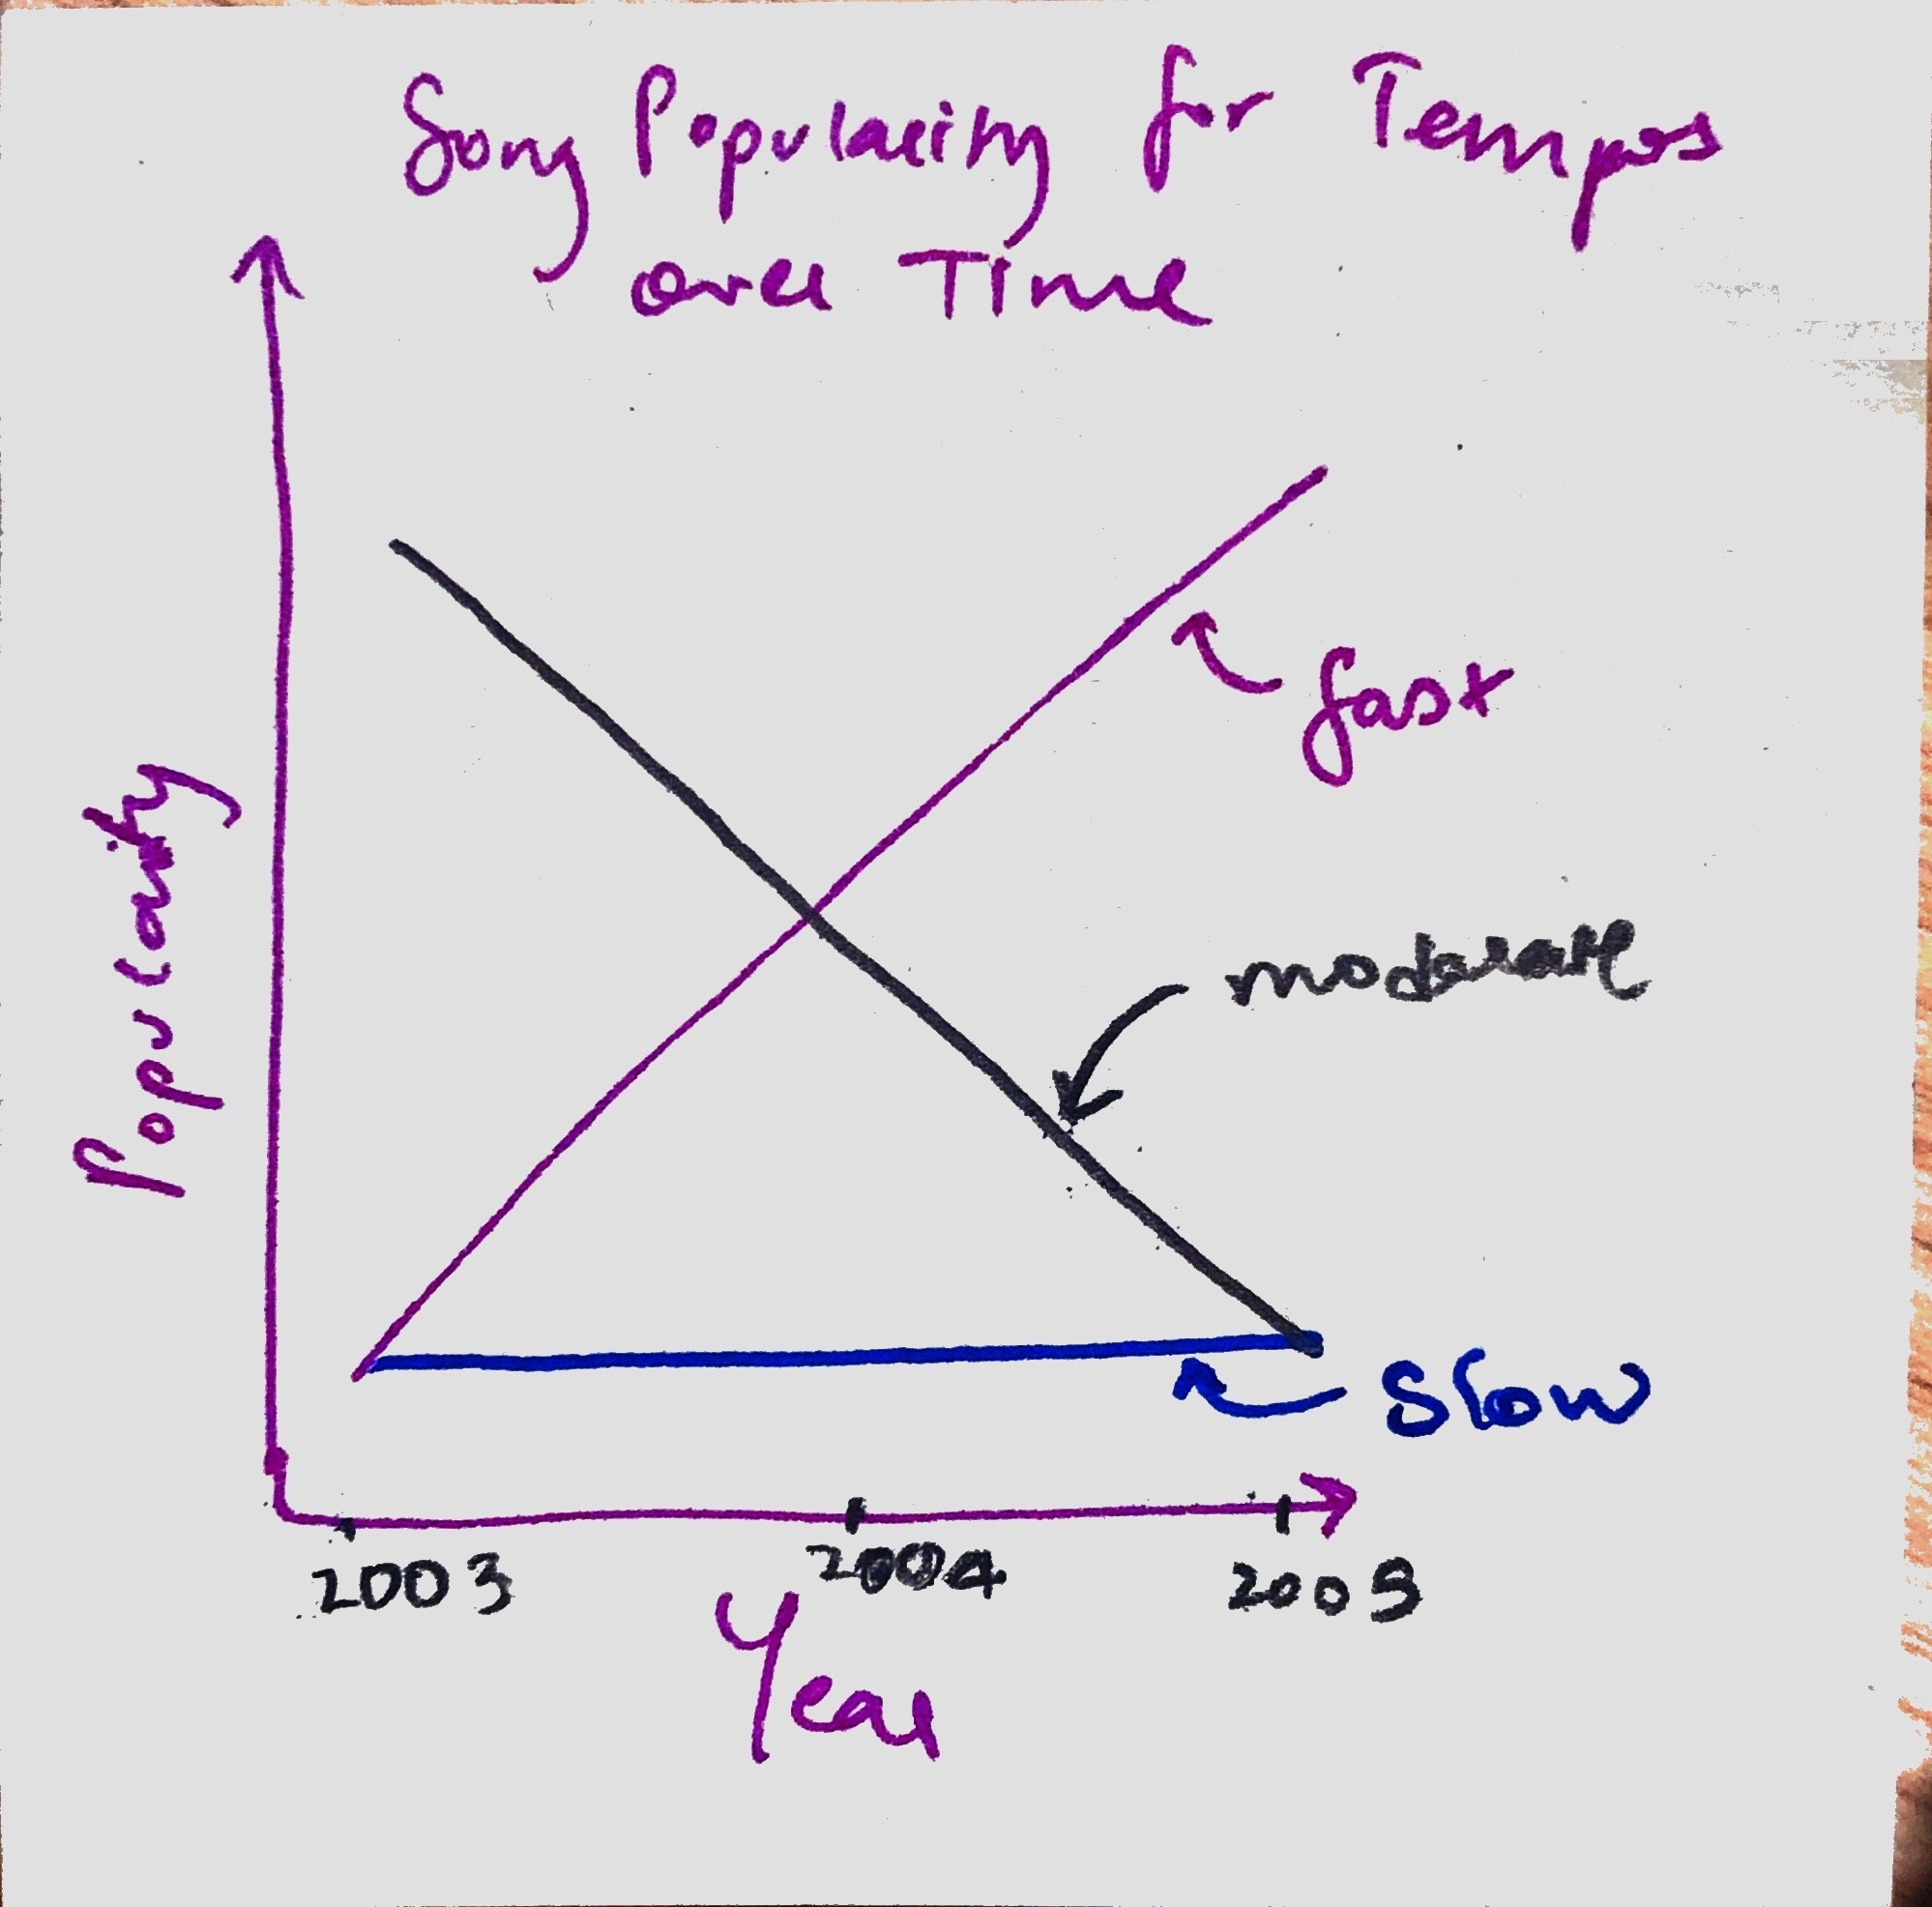

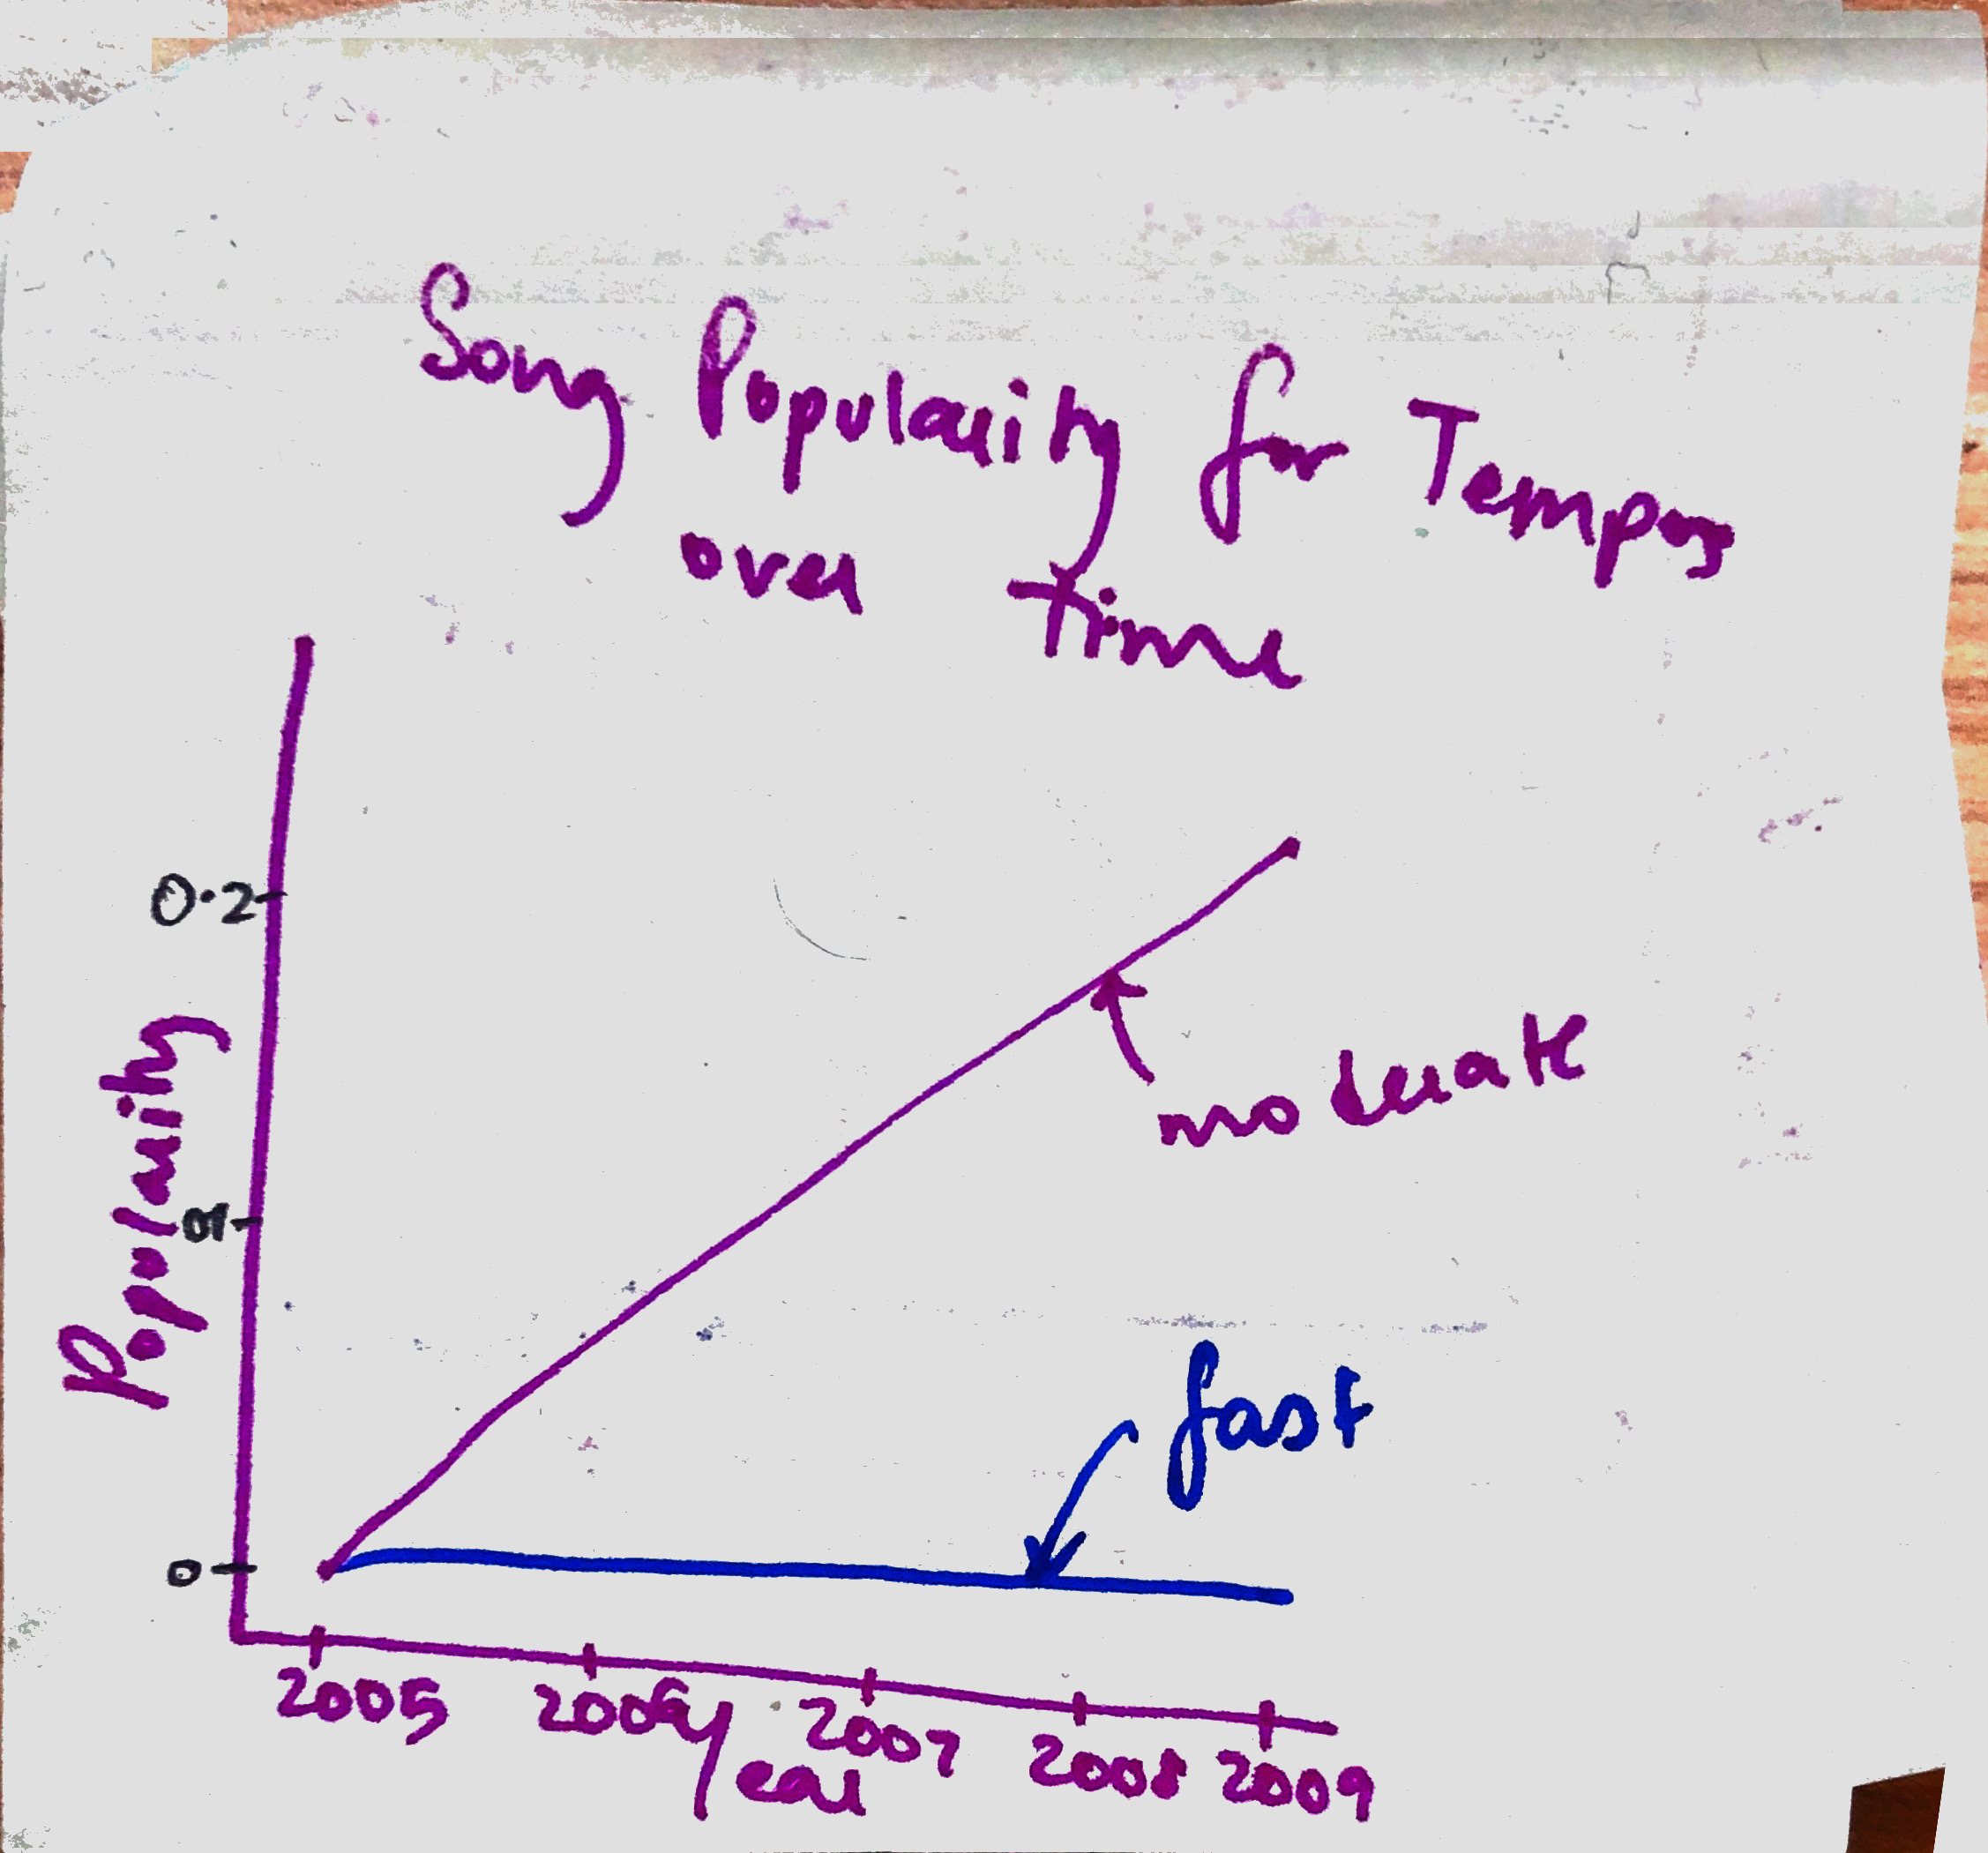

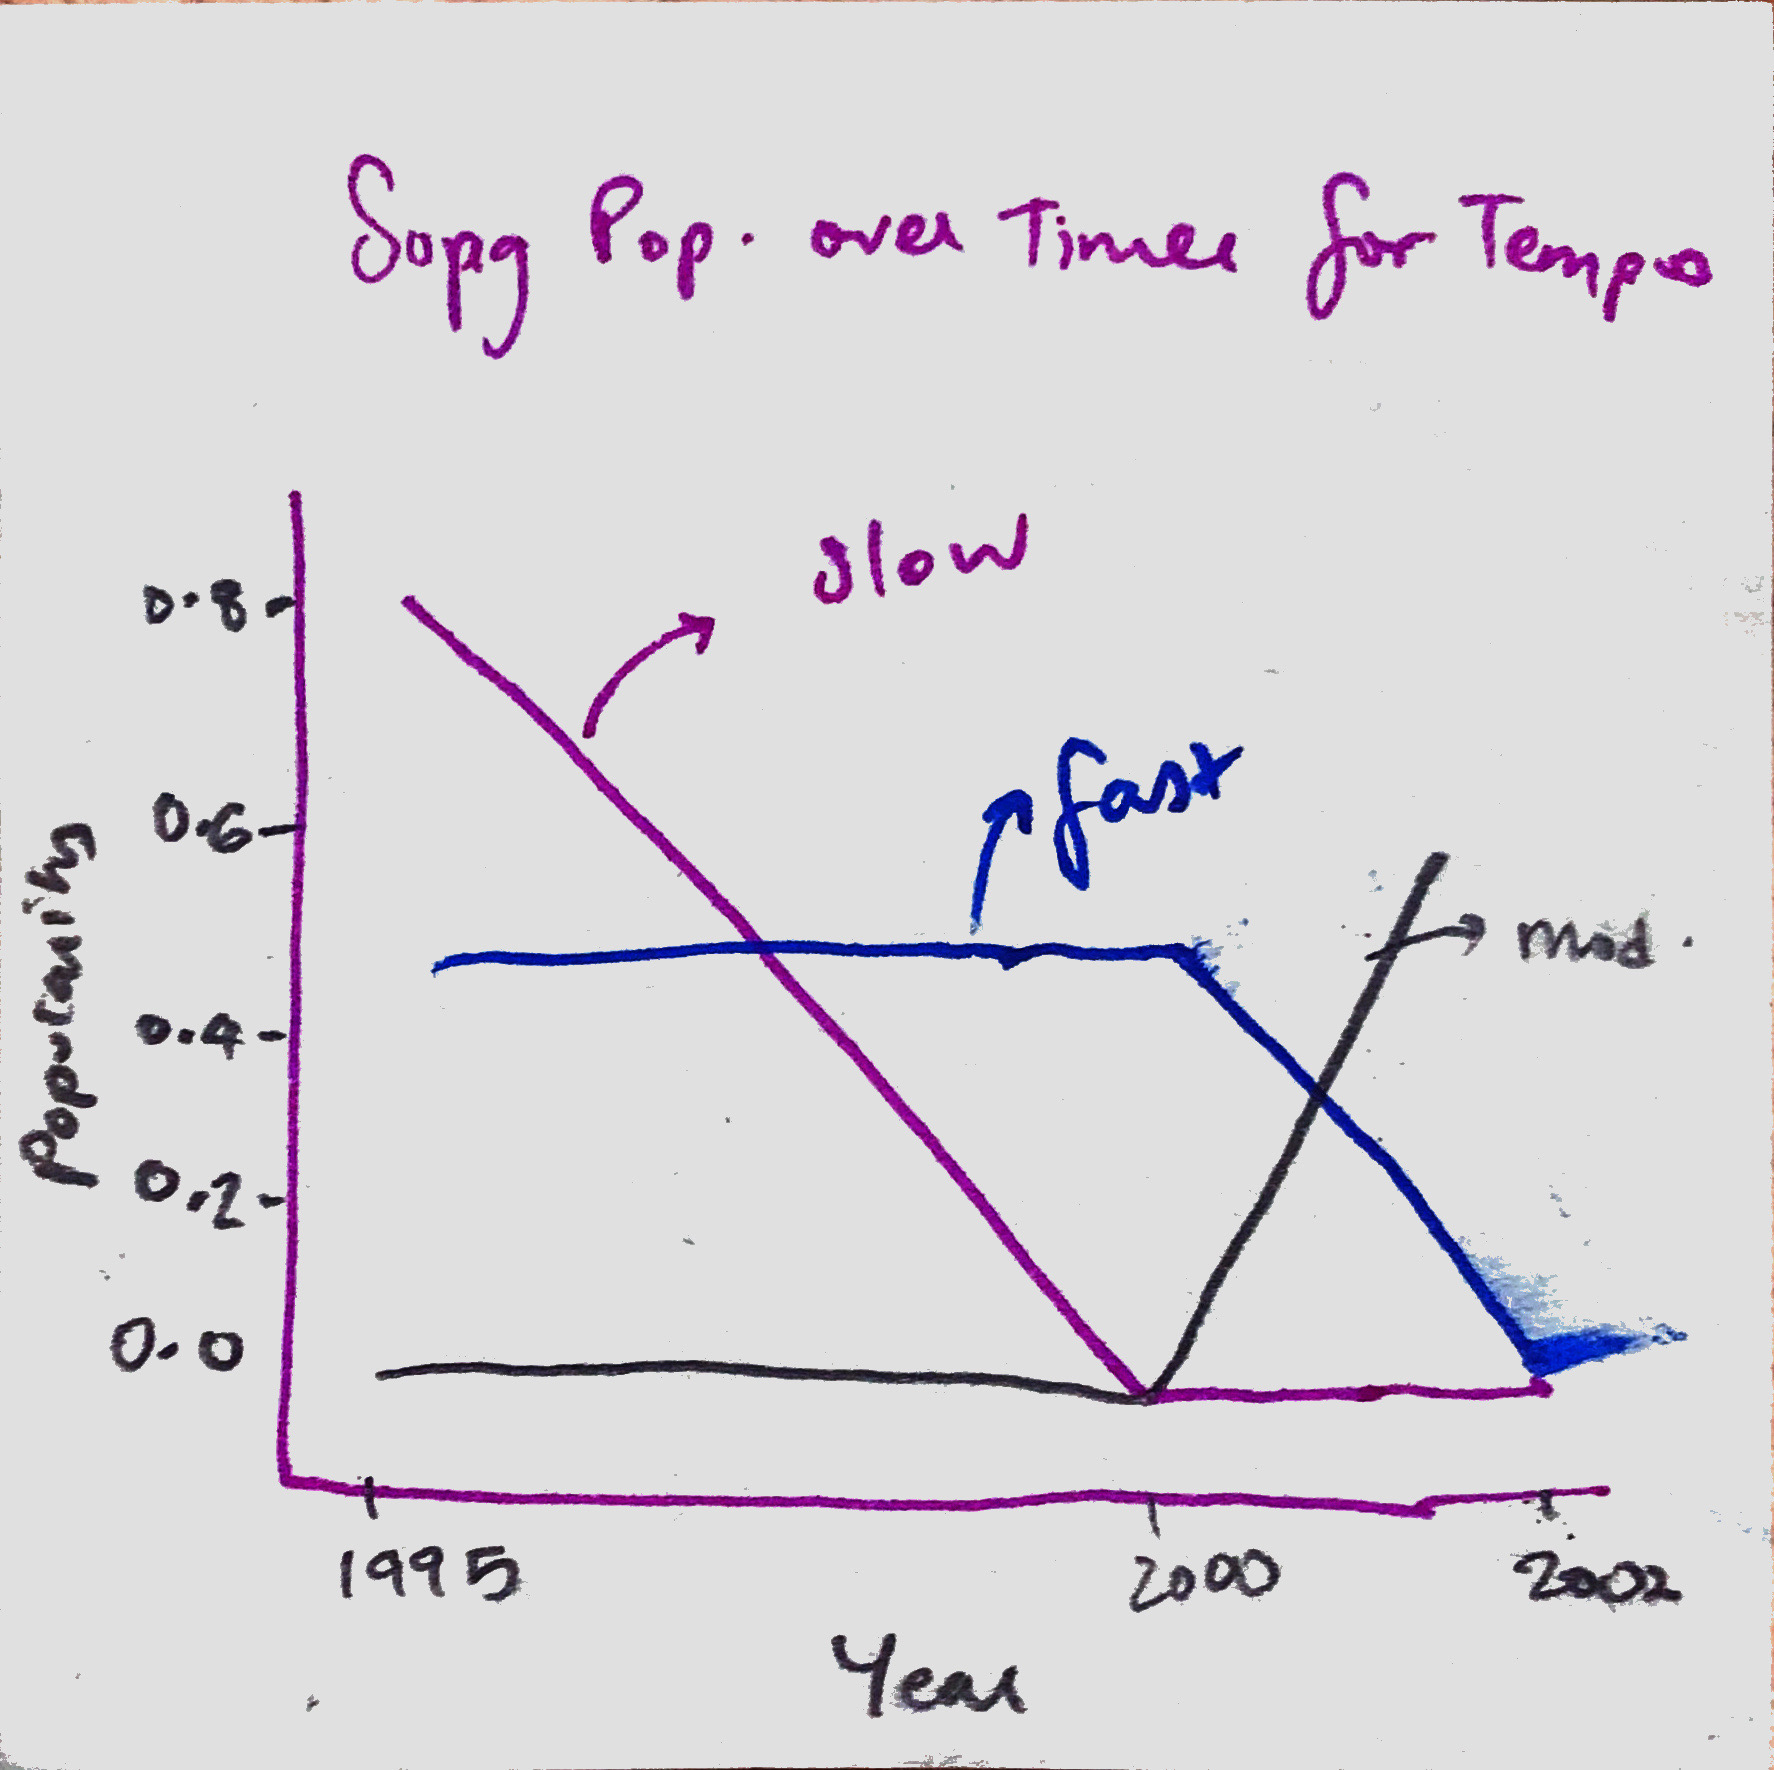

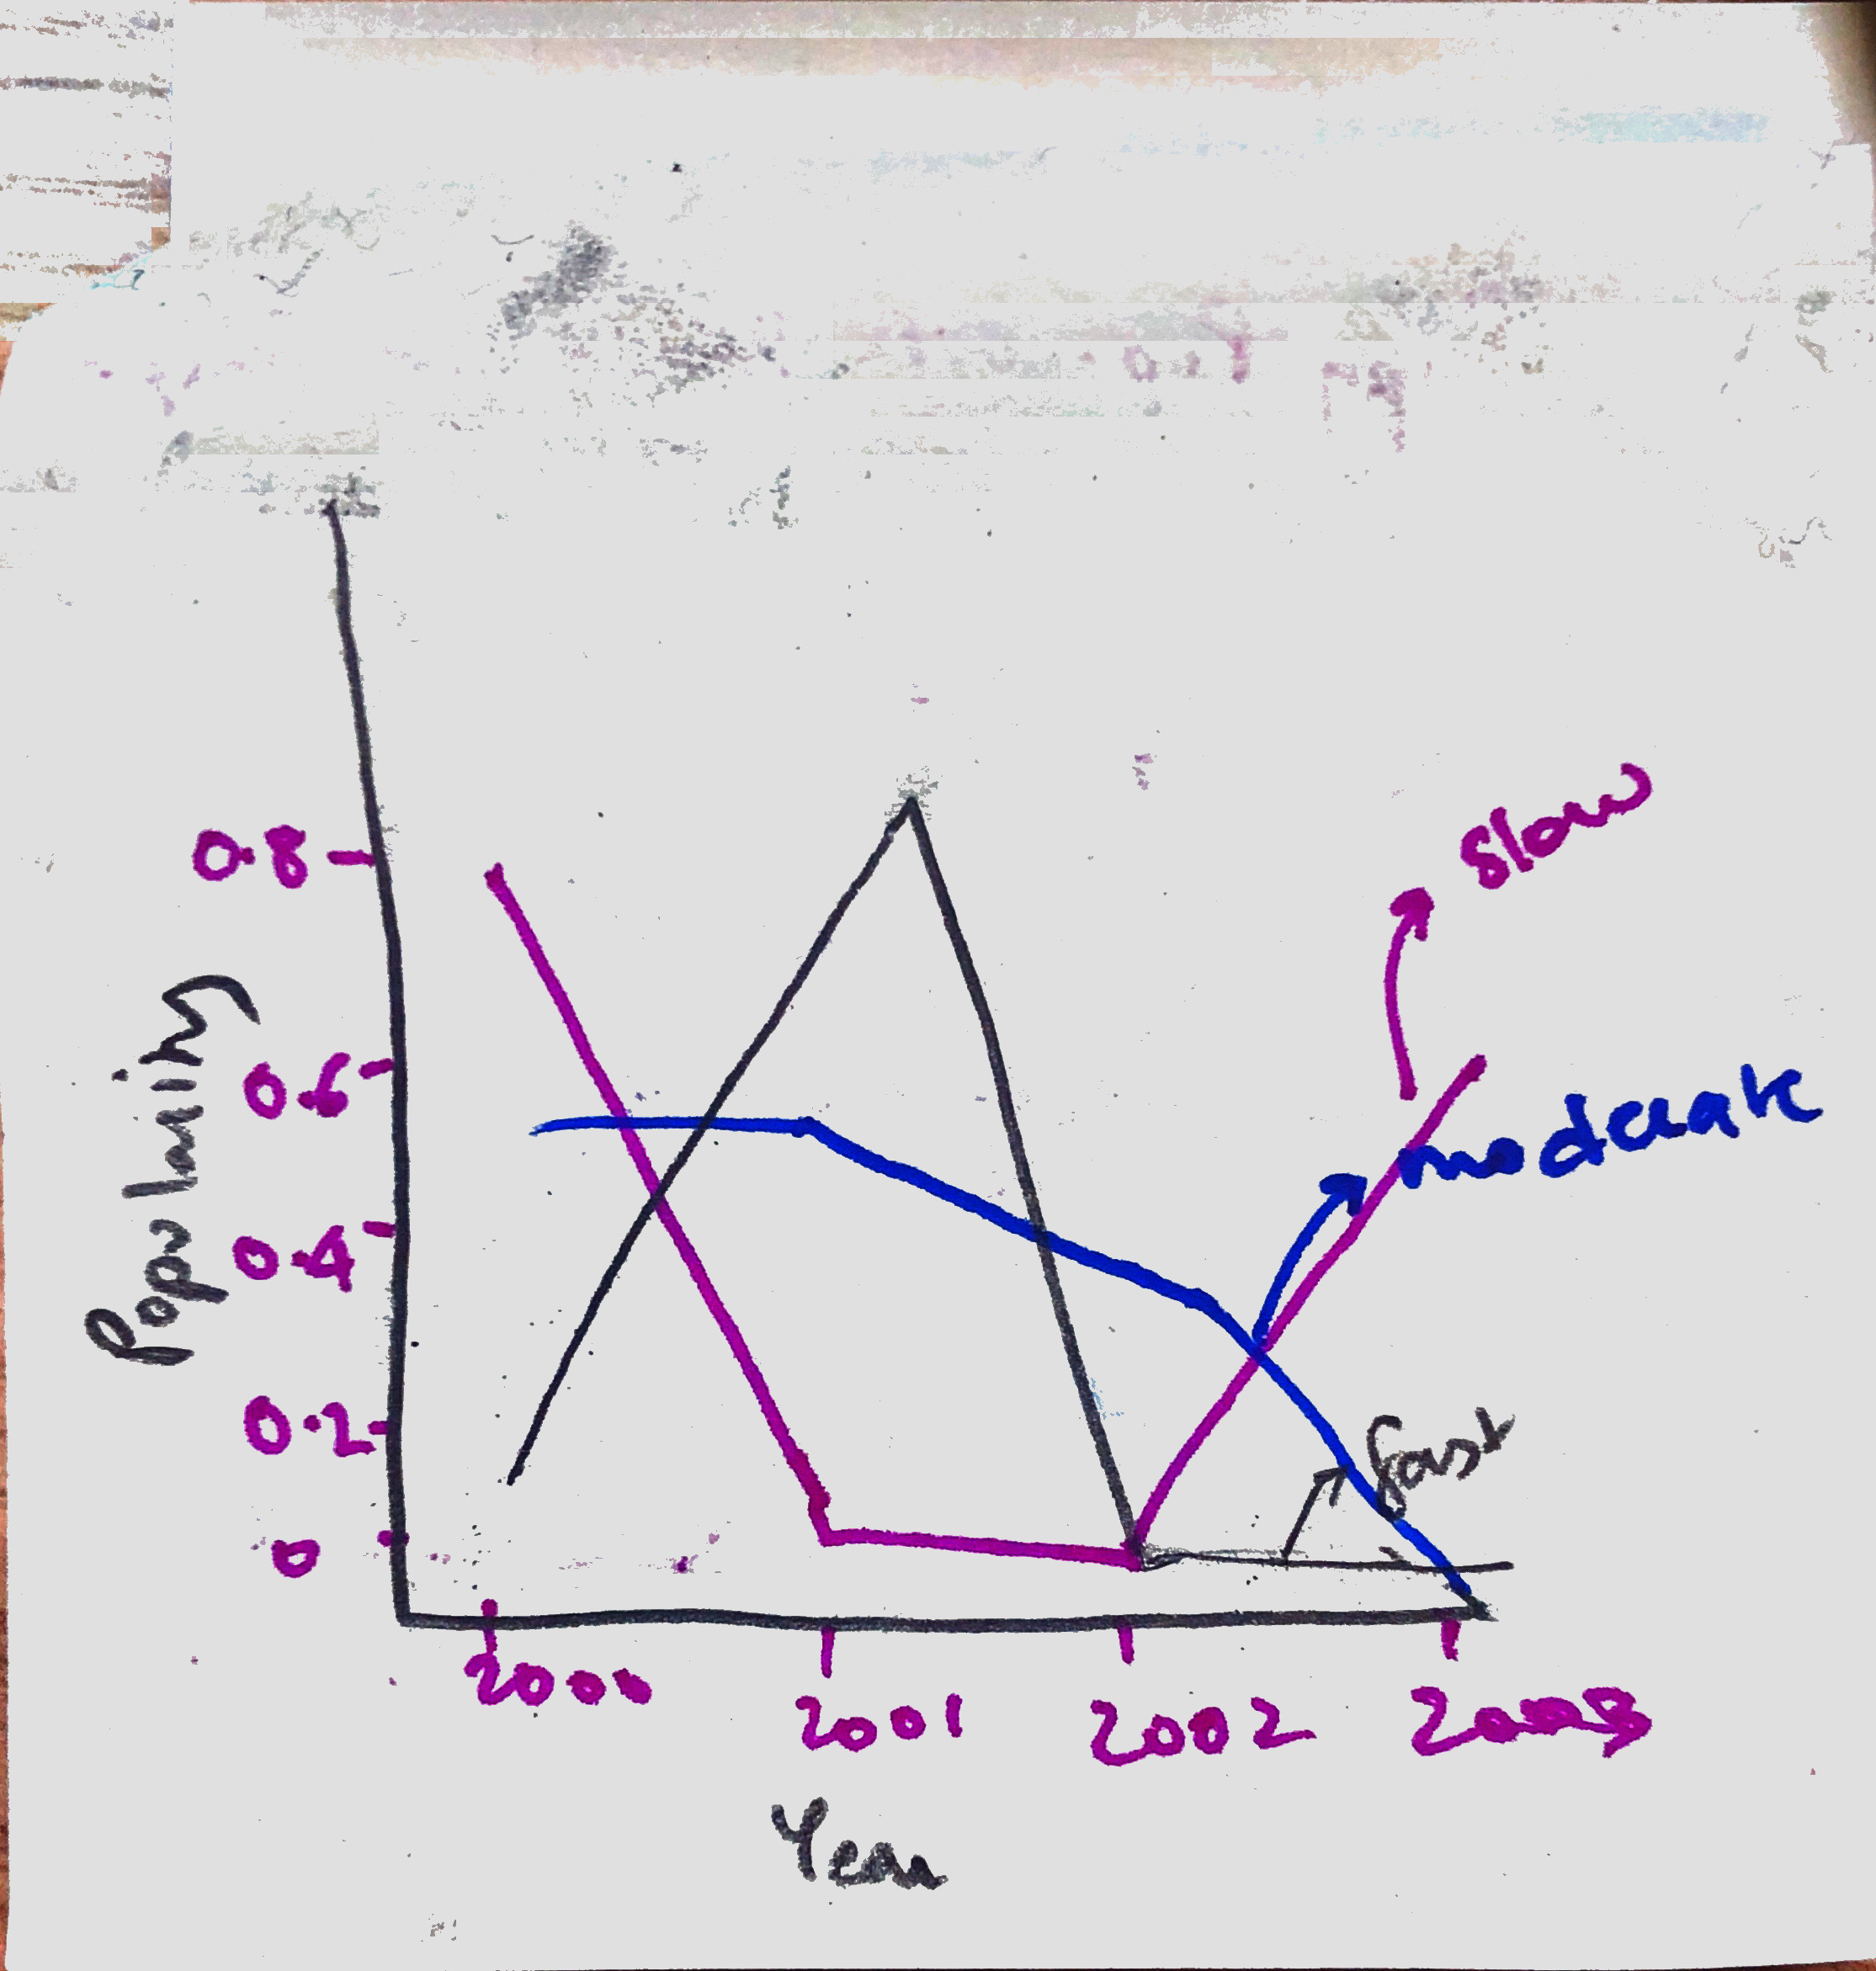

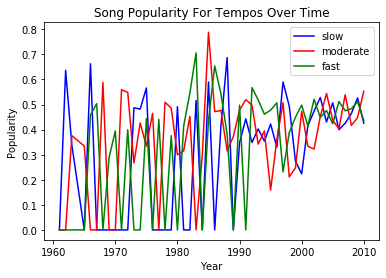

In [3]:
main("songs-1.csv", 0, 100, 140, 250)

# Since the actual file was too large, I have made a smaller file to show the final graph. 
# However, in the cell below, I will call the main function of the songs.csv file too.

In [ ]:
main("songs.csv", 0, 100, 140, 250)
